<a href="https://colab.research.google.com/github/yox19/Stroke-Prediction-Model/blob/main/Stroke_Prediction_Model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1 Setup

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/stroke-prediction-dataset")

print("Path to dataset files:", path)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


Step 2 Load data

In [ ]:
#Load data
df = pd.read_csv(path + "/healthcare-dataset-stroke-data.csv")
df.head()

Step 3: Data cleaning and Wrangling

In [ ]:
#replace missing BMI data with mean
df['bmi'].fillna((df['bmi'].mean()), inplace=True)
df.head()

Step 4: Exploratory Data Analysis(EDA)


Group the 'age' column into bins to reduce the number of distinct categories.


In [6]:
# Define bins and labels for age groups
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Create a new column 'age_group' by binning the 'age' column
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Display the first few rows with the new 'age_group' column
display(df.head())

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,61-70
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,61-70
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,81-90
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,41-50
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,71-80


In [ ]:
# Group by age_group and stroke, count occurrences
stroke_counts = df.groupby(['age_group', 'stroke']).size()

# Unstack and fill missing values
stroke_counts_unstacked = stroke_counts.unstack().fillna(0)

# Rename columns for clarity
stroke_counts_unstacked.columns = ['No Stroke', 'Stroke']

# Display the resulting DataFrame
display(stroke_counts_unstacked)

STEP 5  Data visualization




In [ ]:
# Create a count plot using the stroke_counts_unstacked DataFrame
stroke_counts_unstacked_reset = stroke_counts_unstacked.reset_index()
sns.barplot(x='age_group', y='No Stroke', data=stroke_counts_unstacked_reset, color='skyblue', label='No Stroke')
sns.barplot(x='age_group', y='Stroke', data=stroke_counts_unstacked_reset, color='salmon', label='Stroke')

# Set the title of the plot
plt.title('Stroke Occurrence by Age Group')

# Add appropriate labels to the x and y axes
plt.xlabel('Age Group')
plt.ylabel('Number of Occurrences')
plt.legend()

# Display the plot
plt.show()

av_glucose_level and stroke

**Data wrangling**: Create a new column to categorize glucose levels into 'High' (>= 200) and 'Low' (< 200).

In [ ]:
df['glucose_group'] = df['avg_glucose_level'].apply(lambda x: 'High' if x >= 200 else 'Low')
display(df.head())

**Data analysis**: Group the data by the new glucose category and stroke, and count the occurrences.

In [ ]:
grouped_data = df.groupby(['glucose_group', 'stroke']).size()
grouped_unstacked = grouped_data.unstack().fillna(0)
grouped_unstacked.columns = ['No Stroke', 'Stroke']
display(grouped_unstacked)

**Data visualization**: Create a bar plot to visualize the stroke occurrence for each glucose category.

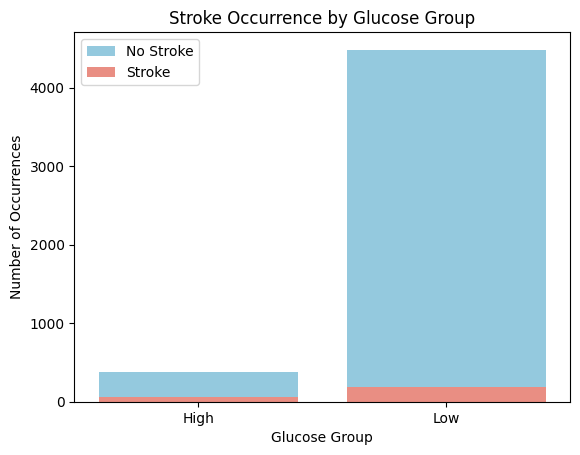

In [12]:
grouped_unstacked_reset = grouped_unstacked.reset_index()

sns.barplot(x='glucose_group', y='No Stroke', data=grouped_unstacked_reset, color='skyblue', label='No Stroke')
sns.barplot(x='glucose_group', y='Stroke', data=grouped_unstacked_reset, color='salmon', label='Stroke')

plt.xlabel('Glucose Group')
plt.ylabel('Number of Occurrences')
plt.title('Stroke Occurrence by Glucose Group')
plt.legend()
plt.show()

BMI and Stroke

In [ ]:
# creat BMI sub catagory as: 18.5=< x >=24.9, 25.0 < x <29.9 and > 30
# define subgroup values
bins = [0, 18.5, 24.9, 29.9, float('inf')]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
df['bmi_group'] = pd.cut(df['bmi'], bins=bins, labels=labels, right=True)

# Group by bmi_group and stroke, count occurrences
bmi_stroke_counts = df.groupby(['bmi_group', 'stroke']).size()

# Unstack and rename columns
bmi_stroke_counts_unstacked = bmi_stroke_counts.unstack().fillna(0)
bmi_stroke_counts_unstacked.columns = ['No Stroke', 'Stroke']

# Display the resulting DataFrame
display(bmi_stroke_counts_unstacked)

In [ ]:
#plot value count for stroke occurrence in bmi groups
bmi_stroke_counts_unstacked_reset = bmi_stroke_counts_unstacked.reset_index()
sns.barplot(x='bmi_group', y='No Stroke', data=bmi_stroke_counts_unstacked_reset, color='skyblue', label='No Stroke')
sns.barplot(x = 'bmi_group', y = 'Stroke', data = bmi_stroke_counts_unstacked_reset, color = 'salmon', label = 'Stroke')
plt.xlabel('BMI Group')
plt.ylabel('Number of Occurrences')
plt.title('Stroke Occurrence by BMI Group')


Hypertension and Stroke

In [ ]:
# creat catagory for stroke occurrence and hypertension
hypertension_stroke_counts = df.groupby(['hypertension', 'stroke']).size()
# rename catagory columon asstroke and no stroke
hypertension_stroke_counts_unstacked = hypertension_stroke_counts.unstack().fillna(0)
hypertension_stroke_counts_unstacked.columns = ['No Stroke', 'Stroke']
display(hypertension_stroke_counts_unstacked)

In [ ]:
#plot for stroke occurrence in hypertension group
hypertension_stroke_counts_unstacked_reset = hypertension_stroke_counts_unstacked.reset_index()
sns.barplot(x='hypertension', y='No Stroke', data=hypertension_stroke_counts_unstacked_reset, color='skyblue', label='No Stroke')
sns.barplot(x='hypertension', y='Stroke', data=hypertension_stroke_counts_unstacked_reset, color='salmon', label='Stroke')
plt.xlabel('Hypertension Group')
plt.ylabel('Number of Occurrences')
plt.title('Stroke Occurrence by Hypertension Group')
plt.legend()
plt.show()

Heart disease and Stroke

In [ ]:
# creat catagory for heart_disease and stroke
df.groupby(['heart_disease', 'stroke']).size()
# rename catagory and display
heart_disease_stroke_counts = df.groupby(['heart_disease', 'stroke']).size()
heart_disease_stroke_counts_unstacked = heart_disease_stroke_counts.unstack().fillna(0)
heart_disease_stroke_counts_unstacked.columns = ['No Stroke', 'Stroke']
display(heart_disease_stroke_counts_unstacked)


In [ ]:
# plot barchart for stroke occurrence in heart_diseases group
heart_disease_stroke_counts_unstacked_reset = heart_disease_stroke_counts_unstacked.reset_index()
sns.barplot(x = heart_disease_stroke_counts_unstacked_reset.index, y = 'No Stroke', data = heart_disease_stroke_counts_unstacked_reset, color = 'skyblue', label = 'No Stroke')
sns.barplot(x = heart_disease_stroke_counts_unstacked_reset.index, y = 'Stroke', data = heart_disease_stroke_counts_unstacked_reset, color = 'salmon', label = 'Stroke')
plt.xlabel('Heart Disease Group')
plt.ylabel('Number of Occurrences')
plt.title('Stroke Occurrence by Heart Disease Group')

Step 6: Correlation Analysis

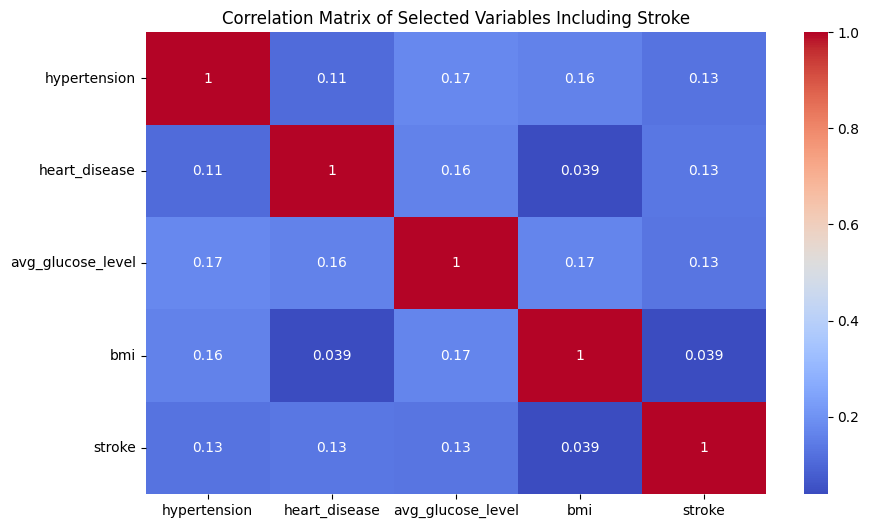

In [19]:
# Heatmap to see correlations between variables.
correlation_cols = ['hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
corr = df[correlation_cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix of Selected Variables Including Stroke')
plt.show()

Step 7: Modeling (Predicting Stroke)

In [ ]:
# Select features and target variable
X = df.drop("stroke", axis=1)
y = df["stroke"]

# Drop the 'age_group' and 'bmi_group' columns as they are categorical representations of numerical data
X = X.drop(['age_group', 'bmi_group', 'glucose_group'], axis=1)


# Identify categorical columns
categorical_cols = X.select_dtypes(include='object').columns

# Apply one-hot encoding to categorical columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000) # Increased max_iter for convergence
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Step 8: Model Refinement


In [21]:
# Random Forest or Gradient Boosting
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
print("Accuracy:", accuracy_score(y_test, rf.predict(X_test)))


Accuracy: 0.9393346379647749


Logistic Regression + Random Forest

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight="balanced"),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight="balanced")
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))


ROC Curve Visualization

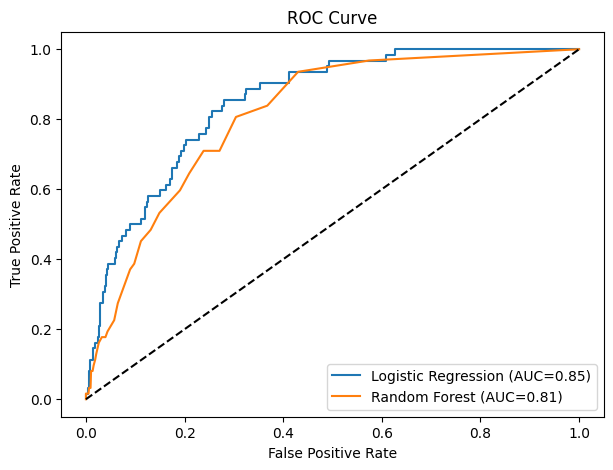

In [23]:
plt.figure(figsize=(7,5))
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc_score(y_test, y_prob):.2f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


Remarks
 **Age, Hypertension and Heart diseases** were strong predictors in the dataset.
  Identifying patients at risk enables early **Preventive interventions**.